In [4]:
import requests
import json
import time

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
tipos = []
quantTipos = []
anos = []
quantAno = []
projZero = 0
acimaTeto = 0

totalUrl = 'http://api.salic.cultura.gov.br/v1/projetos/?format=json&'
res = requests.get(totalUrl)
res = json.loads(res.content.decode('utf-8'))
tot=res['total']
tot -= 2

carnaval = 0
totCarnaval = 0

url = 'http://api.salic.cultura.gov.br/v1/projetos/?offset='
url2 = '&format=json&'
totalAprovado = 0
totalSolicitado = 0

In [6]:
for x in range(0,tot,100):
    print(x)
    res = requests.get(url+str(x)+url2)
    res = json.loads(res.content.decode('utf-8'))
    proj = res['_embedded']['projetos']
    for d in range(len(proj)):
        nome = res['_embedded']['projetos'][d]['nome']
        projeto = res['_embedded']['projetos'][d]['area']
        ano = res['_embedded']['projetos'][d]['ano_projeto']
        cgccpf = res['_embedded']['projetos'][d]['cgccpf']
        
        #Verifica valores solicitados e aprovados de cada projeto   
        valorAprovado = float(res['_embedded']['projetos'][d]['valor_aprovado'])
        valorSolicitado = float(res['_embedded']['projetos'][d]['valor_proposta'])
        ano = res['_embedded']['projetos'][d]['ano_projeto']
        
        #Quantidade de projetos com valor solicitado igual a 0
        if(valorSolicitado>1):
            projZero += 1
            
        if((len(cgccpf)>=13 and valorAprovado>10000000) or (len(cgccpf)==11 and valorAprovado>700000)):
            acimaTeto += 1
            print('Projeto acima do teto:')
            print("------Nome: "+nome)
            print("------CPF ou CNPJ: ",cgccpf)
            print("------Valor aprovado: ",valorAprovado)
        
        #Separa e quantifica projetos de ocordo com os tipos
        if(projeto not in tipos):
            tipos.append(projeto)
            quantTipos.append(1)
        else:
            z = tipos.index(projeto)
            quantTipos[z] += 1
            
        if(ano not in anos):
            anos.append(ano)
            quantAno.append(valorAprovado)
        else:
            i = anos.index(ano)
            quantAno[i] += valorAprovado
       

        #Soma total repassado para carnaval de 2019
        if(('carnaval' in nome.lower() or 'carnaval' in str(projeto).lower())and (ano=='18')):
            
            carnaval += 1
            totCarnaval += valorAprovado
        
        #Imprime projetos a a cada 2000 resultados obtidos
        if(x%2000==0):
            #Exibe resultados
            print("ID: ",d+(x))
            print("Nome do projeto: ",nome)
            print("Área do projeto: ",projeto)


            print("Total Solicitado: %.2f" %valorSolicitado)
            print("Total Aprovado: %.2f" %valorAprovado)

        totalSolicitado+=float(valorSolicitado)            
        totalAprovado+=float(valorAprovado)

0
ID:  0
Nome do projeto:  LUANA
Área do projeto:  Audiovisual
Total Solicitado: 954986.38
Total Aprovado: 954986.38
Projeto acima do teto:
------Nome: Maracatum
------CPF ou CNPJ:  ***481259**
------Valor aprovado:  1495668.38
ID:  1
Nome do projeto:  Maracatum
Área do projeto:  Audiovisual
Total Solicitado: 1495668.38
Total Aprovado: 1495668.38
ID:  2
Nome do projeto:  Corinthians - Uma História de Glórias e Paixão
Área do projeto:  Audiovisual
Total Solicitado: 371250.00
Total Aprovado: 371250.00
ID:  3
Nome do projeto:  Atauara e o Mundo Encantado da Natureza
Área do projeto:  Audiovisual
Total Solicitado: 430083.77
Total Aprovado: 430083.77
ID:  4
Nome do projeto:  Gaya - MMORPG
Área do projeto:  Audiovisual
Total Solicitado: 466022.70
Total Aprovado: 466022.70
ID:  5
Nome do projeto:  Prêmio Brasil Criativo
Área do projeto:  Audiovisual
Total Solicitado: 964316.47
Total Aprovado: 964316.47
ID:  6
Nome do projeto:  Filhos do Fogo 
Área do projeto:  Audiovisual
Total Solicitado: 24

Projeto acima do teto:
------Nome: Restauração e readequação arquitetônica do casarão do século XVIII no Largo do Pelourinho, nº 10
------CPF ou CNPJ:  30775133000109
------Valor aprovado:  10269805.02
Projeto acima do teto:
------Nome: Plano Anual de Atividades do Instituto Porto Seguro 2019
------CPF ou CNPJ:  06864650000161
------Valor aprovado:  12953216.61
200
Projeto acima do teto:
------Nome: Produção do CD/DVD:  Edu Farias -  Conquistas - Ao Vivo em Goiânia
------CPF ou CNPJ:  ***636049**
------Valor aprovado:  705695.25
Projeto acima do teto:
------Nome: TAFFINHO Em Busca do Captador Mágico  
------CPF ou CNPJ:  ***120518**
------Valor aprovado:  702954.0
Projeto acima do teto:
------Nome: ÉPIDO O REI
------CPF ou CNPJ:  ***526288**
------Valor aprovado:  731362.5
Projeto acima do teto:
------Nome: Flores Mágicas A Missão
------CPF ou CNPJ:  ***094437**
------Valor aprovado:  798781.5
Projeto acima do teto:
------Nome: Animapraça - Edição I
------CPF ou CNPJ:  ***401318**
----

Projeto acima do teto:
------Nome: Natal Luz de Ouro Preto
------CPF ou CNPJ:  ***322576**
------Valor aprovado:  1482664.0
Projeto acima do teto:
------Nome: MASP 2019 (Plano Anual)
------CPF ou CNPJ:  60664745000187
------Valor aprovado:  28788912.19
Projeto acima do teto:
------Nome: FRITZ PLAUMANN - A Imortalização de sua obra em livro, biblioteca e museu virtual
------CPF ou CNPJ:  ***131769**
------Valor aprovado:  995584.5
Projeto acima do teto:
------Nome: Humor em Dose Dupla
------CPF ou CNPJ:  ***373918**
------Valor aprovado:  853701.25
Projeto acima do teto:
------Nome: Ilumina Festival 2019
------CPF ou CNPJ:  ***815338**
------Valor aprovado:  1112396.4
1400
Projeto acima do teto:
------Nome: Plano Anual de Atividades da Santa Marcelina Cultura 2019
------CPF ou CNPJ:  10462524000158
------Valor aprovado:  14889187.22
Projeto acima do teto:
------Nome: dvd e turne da dupla carvalho & mariano 
------CPF ou CNPJ:  ***905006**
------Valor aprovado:  1122767.25
1500
Projeto a

Projeto acima do teto:
------Nome: Primeiro Rodeio Regional de Jacarezinho .
------CPF ou CNPJ:  ***636589**
------Valor aprovado:  712690.5
Projeto acima do teto:
------Nome: Alison Heringer ao Vivo
------CPF ou CNPJ:  ***866659**
------Valor aprovado:  945174.0
2200
Projeto acima do teto:
------Nome: AS CORES DO BRASIL – RETRATOS DO POVO BRASILEIRO
------CPF ou CNPJ:  ***202158**
------Valor aprovado:  724295.7
Projeto acima do teto:
------Nome: ORQUESTRA SINFÔNICA DE TAUBATÉ - CONCERTOS INAUGURAIS - 2019
------CPF ou CNPJ:  ***577148**
------Valor aprovado:  1498131.05
Projeto acima do teto:
------Nome: The Wiz (Provisório)
------CPF ou CNPJ:  30012255000135
------Valor aprovado:  15136965.0
2300
Projeto acima do teto:
------Nome: Best of Blues
------CPF ou CNPJ:  65935280000175
------Valor aprovado:  10844569.91
Projeto acima do teto:
------Nome:  Gravação DVD Brigitte Bardot Band Sunset 20 Anos / Turnê de Lançamento
------CPF ou CNPJ:  ***260123**
------Valor aprovado:  1010593.0


4200
Projeto acima do teto:
------Nome: Ativação do Centro Cultural em Saúde da Unifesp
------CPF ou CNPJ:  07437996000146
------Valor aprovado:  12025624.48
4300
4400
4500
4600
Projeto acima do teto:
------Nome: Registro e Preservação Digital do Patrimônio Histórico. Nossas Memorias Compartilhadas e Preservadas em Definitivo.
------CPF ou CNPJ:  11316557000152
------Valor aprovado:  11195851.14
Projeto acima do teto:
------Nome: Desfiles Carnavalescos na Sapucai 2018
------CPF ou CNPJ:  28715167000158
------Valor aprovado:  15582199.53
Projeto acima do teto:
------Nome: Restauro e Ampliação do Museu Histórico e Pedagógico das Monções
------CPF ou CNPJ:  02414436000152
------Valor aprovado:  11723247.17
4700
4800
4900
5000
5100
Projeto acima do teto:
------Nome: CONSTRUÇÃO DE NOVO EQUIPAMENTO MUSEAL PARA AMPLIAÇÃO DO MUSEU SACRO FRANCISCANO
------CPF ou CNPJ:  14721347000138
------Valor aprovado:  52697403.0
5200
5300
5400
Projeto acima do teto:
------Nome: Restauro do Antigo Hospital 

Projeto acima do teto:
------Nome: Museu Maria Regina Mundi - Obras Civis
------CPF ou CNPJ:  17505249000151
------Valor aprovado:  13123093.33
Projeto acima do teto:
------Nome: PROJETO MEMORIAL DA MISERICÓRDIA DA BAHIA
------CPF ou CNPJ:  15153745000168
------Valor aprovado:  10775156.51
6200
Projeto acima do teto:
------Nome: Projetos, Restauro e Modernização do Conjunto Arquitetônico “Solar do Barão de Itapura
------CPF ou CNPJ:  46020301000188
------Valor aprovado:  29185380.99
Projeto acima do teto:
------Nome: Projeto de Restauração e Requalificação da Assembleia Legislativa de Pernambuco
------CPF ou CNPJ:  05629161000162
------Valor aprovado:  17904514.09
6300
6400
6500
Projeto acima do teto:
------Nome: MUSEU DA LÍNGUA PORTUGUESA – EXECUÇÃO DAS OBRAS DE ADAPTAÇÃO INTERNA
------CPF ou CNPJ:  29527413000100
------Valor aprovado:  29554333.02
Projeto acima do teto:
------Nome: PLANO ANUAL 2018 DA APAA - ASSOCIAÇÃO PAULISTA DOS AMIGOS DA ARTE
------CPF ou CNPJ:  06196001000130
--

8200
Projeto acima do teto:
------Nome: Plano Anual de Atividades e Temporada 2018 - Orquestra Sinfônica Brasileira
------CPF ou CNPJ:  33659327000129
------Valor aprovado:  27889780.11
Projeto acima do teto:
------Nome: NATAL DOS SONHOS
------CPF ou CNPJ:  31887847000163
------Valor aprovado:  13628644.12
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
ID:  10000
Nome do projeto:  Ponto de Encontro com Escritores
Área do projeto:  Artes Integradas
Total Solicitado: 0.00
Total Aprovado: 0.00
ID:  10001
Nome do projeto:  Mapa dos Museus
Área do projeto:  Artes Integradas
Total Solicitado: 0.00
Total Aprovado: 0.00
ID:  10002
Nome do projeto:  O som do silêncio
Área do projeto:  Artes Integradas
Total Solicitado: 0.00
Total Aprovado: 0.00
ID:  10003
Nome do projeto:  NOAH: UM PROJETO DE MENINO
Área do projeto:  Artes Integradas
Total Solicitado: 0.00
Total Aprovado: 0.00
ID:  10004
Nome do projeto:  Mão na roda
Área do projeto:  Artes Integradas

10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
Projeto acima do teto:
------Nome: Plano Anual 2018 da Pinacoteca de São Paulo 
------CPF ou CNPJ:  96290846000182
------Valor aprovado:  16084372.0
11700
Projeto acima do teto:
------Nome: Obra de Restauração e Conservação do Edifício BEMGE
------CPF ou CNPJ:  26001007000111
------Valor aprovado:  26161487.46
Projeto acima do teto:
------Nome: Plano Anual de Atividades MAM/SP 2018
------CPF ou CNPJ:  62520218000124
------Valor aprovado:  19726804.49
11800
Projeto acima do teto:
------Nome: IMPLANTAÇÃO DO MUSEU JUDAICO 
------CPF ou CNPJ:  04414533000170
------Valor aprovado:  12943694.75
11900
Projeto acima do teto:
------Nome: Plano Anual do Instituto Tomie Ohtake - 2018
------CPF ou CNPJ:  00984768000147
------Valor aprovado:  37927023.1
Projeto acima do teto:
------Nome: Colégio Estadual do Paraná
------CPF ou CNPJ:  02392034000102
------Valor aprovado:  24161977.05
12000
ID:  12000
Nome do pr

12200
12300
12400
12500
12600
Projeto acima do teto:
------Nome: SÃO JOÃO DE CARUARU CULTURAL
------CPF ou CNPJ:  01374871000138
------Valor aprovado:  10316564.57
12700
12800
12900
13000
13100
13200
13300
13400
13500
Projeto acima do teto:
------Nome: Conservação Emergencial dos Edifícios do Pátio Ferroviário de Paranapiacaba
------CPF ou CNPJ:  49731466000156
------Valor aprovado:  18150991.67
13600
13700
13800
Projeto acima do teto:
------Nome: OPEN AIR 2017
------CPF ou CNPJ:  05320143000102
------Valor aprovado:  10070832.0
13900
14000
ID:  14000
Nome do projeto:  Salão Graciosa
Área do projeto:  Artes Visuais
Total Solicitado: 500115.00
Total Aprovado: 0.00
ID:  14001
Nome do projeto:  Ao Pôr do Sou
Área do projeto:  Artes Cênicas
Total Solicitado: 888010.00
Total Aprovado: 831110.00
ID:  14002
Nome do projeto:  Coral Infantil Sociedade Cultural Lírica
Área do projeto:  Música
Total Solicitado: 81350.00
Total Aprovado: 81350.00
ID:  14003
Nome do projeto:  Festa dos Santos Popula

14200
Projeto acima do teto:
------Nome: O Homem de La Mancha - Turnê Nacional
------CPF ou CNPJ:  16827643000143
------Valor aprovado:  11217126.45
14300
14400
14500
Projeto acima do teto:
------Nome: Plano Anual de atividades MAM 2017
------CPF ou CNPJ:  00367651000114
------Valor aprovado:  11850534.12
Projeto acima do teto:
------Nome: CASA DE CULTURA E CIDADANIA - PLANO ANUAL 2017
------CPF ou CNPJ:  09462163000160
------Valor aprovado:  12459165.87
14600
14700
14800
Projeto acima do teto:
------Nome: Plano Anual 2017 - Fundação Bienal de São Paulo
------CPF ou CNPJ:  60991585000180
------Valor aprovado:  24453706.0
Projeto acima do teto:
------Nome: Plano Anual de Atividades Osesp 2017
------CPF ou CNPJ:  07495643000100
------Valor aprovado:  34378909.67
Projeto acima do teto:
------Nome: Plano Anual de Atividades do Theatro Municipal de São Paulo
------CPF ou CNPJ:  02612590000481
------Valor aprovado:  16238096.0
14900
15000
15100
15200
Projeto acima do teto:
------Nome: Plano 

16200
Projeto acima do teto:
------Nome: Liga da Mata
------CPF ou CNPJ:  ***262448**
------Valor aprovado:  760936.0
16300
16400
Projeto acima do teto:
------Nome: Museu de Arte do Rio – Plano Anual 2017
------CPF ou CNPJ:  02612590000210
------Valor aprovado:  21374554.85
Projeto acima do teto:
------Nome: Plano Anual do Instituto Tomie Ohtake - 2017
------CPF ou CNPJ:  00984768000147
------Valor aprovado:  27669447.8
Projeto acima do teto:
------Nome: Museu da Língua Portuguesa – Desenvolvimento e implantação de museografia
------CPF ou CNPJ:  29527413000100
------Valor aprovado:  22014000.0
16500
Projeto acima do teto:
------Nome: Projeto da Revitalização da Catedral Imperial de Petrópolis e Implantação da Galeria de Arte Auto-Expositiva
------CPF ou CNPJ:  30205454000160
------Valor aprovado:  11681757.69
16600
16700
16800
16900
17000
17100
17200
17300
Projeto acima do teto:
------Nome: BONECOS DO MUNDO
------CPF ou CNPJ:  03405617000185
------Valor aprovado:  10751344.8
17400
Pro

18200
18300
Projeto acima do teto:
------Nome: Annie
------CPF ou CNPJ:  16827643000143
------Valor aprovado:  12541127.54
18400
Projeto acima do teto:
------Nome: Revitalizacão e Modernizacão do Teatro Cine Palacio
------CPF ou CNPJ:  13310565000117
------Valor aprovado:  12602289.56
18500
18600
18700
18800
18900
19000
Projeto acima do teto:
------Nome: O Triunfo da Cor: o Pós-Impressionismo, obras primas do Museu d Orsay e da Orangerie
------CPF ou CNPJ:  46874756000160
------Valor aprovado:  16548697.0
19100
19200
19300
19400
Projeto acima do teto:
------Nome: Wicked
------CPF ou CNPJ:  02860694000324
------Valor aprovado:  18106714.03
Projeto acima do teto:
------Nome: Restauração do Palácio da Aclamação - Etapa I
------CPF ou CNPJ:  17643364000192
------Valor aprovado:  10294084.52
19500
Projeto acima do teto:
------Nome: Plano Anual &#x2013; Museu do Amanhã 2016
------CPF ou CNPJ:  04393475000499
------Valor aprovado:  11197132.01
Projeto acima do teto:
------Nome: Plano Anual de

20200
Projeto acima do teto:
------Nome: Plano Anual de Atividades 2016 - Itaú Cultural
------CPF ou CNPJ:  57119000000122
------Valor aprovado:  28675466.02
20300
20400
Projeto acima do teto:
------Nome: PLANO ANUAL UNIBES CULTURAL - 2016
------CPF ou CNPJ:  51582658000190
------Valor aprovado:  12856854.25
20500
20600
20700
Projeto acima do teto:
------Nome: Plano Anual de Atividades Osesp 2016
------CPF ou CNPJ:  07495643000100
------Valor aprovado:  30688302.05
20800
20900
21000
21100
21200
21300
21400
21500
21600
21700
21800
21900
22000
ID:  22000
Nome do projeto:  Um Maluco na trilha - Circulação pela Região Norte do BRasil
Área do projeto:  Artes Integradas
Total Solicitado: 0.00
Total Aprovado: 0.00
ID:  22001
Nome do projeto:  Termino do Amor
Área do projeto:  Artes Integradas
Total Solicitado: 0.00
Total Aprovado: 0.00
ID:  22002
Nome do projeto:  DE RESIDÊNCIA EM RESIDÊNCIA
Área do projeto:  Artes Integradas
Total Solicitado: 0.00
Total Aprovado: 0.00
ID:  22003
Nome do proj

22200
22300
22400
22500
22600
22700
22800
22900
23000
23100
23200
23300
23400
Projeto acima do teto:
------Nome: Orquestra Filarmônica de Minas Gerais &#x2013; Plano Anual 2016
------CPF ou CNPJ:  07837375000150
------Valor aprovado:  13155023.52
23500
Projeto acima do teto:
------Nome: PLANO ANUAL 2017 DA ASSOCIAÇÃO PAULISTA DOS AMIGOS DA ARTE - APAA
------CPF ou CNPJ:  06196001000130
------Valor aprovado:  11120080.0
23600
23700
23800
Projeto acima do teto:
------Nome: Plano Anual 2016 Pinacoteca de São Paulo
------CPF ou CNPJ:  96290846000182
------Valor aprovado:  10679043.84
23900
24000
ID:  24000
Nome do projeto:  CEARÁ NATAL DE LUZ 2015
Área do projeto:  Música
Total Solicitado: 1691100.00
Total Aprovado: 1618100.00
ID:  24001
Nome do projeto:  Samba de Noel
Área do projeto:  Música
Total Solicitado: 198620.00
Total Aprovado: 194620.00
ID:  24002
Nome do projeto:  Letras em Cena
Área do projeto:  Artes Cênicas
Total Solicitado: 992150.00
Total Aprovado: 992150.00
ID:  24003
Nome

Projeto acima do teto:
------Nome: Plano anual Amigos do Guri 2016
------CPF ou CNPJ:  01891025000195
------Valor aprovado:  10006020.0
24200
Projeto acima do teto:
------Nome: Festival de Teatro de Curitiba - 25ª Edição
------CPF ou CNPJ:  10568738000103
------Valor aprovado:  10037291.2
Projeto acima do teto:
------Nome: 27º Prêmio da Música Brasileira.
------CPF ou CNPJ:  05100097000128
------Valor aprovado:  11130406.61
Projeto acima do teto:
------Nome: MASP 2016 (Plano Anual)
------CPF ou CNPJ:  60664745000187
------Valor aprovado:  25107314.77
Projeto acima do teto:
------Nome: We will rock you
------CPF ou CNPJ:  04320351000130
------Valor aprovado:  15063745.22
24300
Projeto acima do teto:
------Nome: Museu de Arte do Rio - Plano Anual 2016
------CPF ou CNPJ:  02612590000210
------Valor aprovado:  16947967.84
24400
24500
Projeto acima do teto:
------Nome: Memorial da Anistia Política do Brasil: restauro do Coleginho, montagem e abertura da exposicao de longa duracao
------CPF 

26200
Projeto acima do teto:
------Nome: MEMORIAL HERMÍNIO BITTENCOURTAmpliação, Integração e Evolução
------CPF ou CNPJ:  92797901000174
------Valor aprovado:  14578849.02
26300
26400
26500
26600
Projeto acima do teto:
------Nome: VIRADA CULTURAL REPERCUSSIVA
------CPF ou CNPJ:  07044879000112
------Valor aprovado:  12464662.0
26700
26800
26900
Projeto acima do teto:
------Nome: Projeto Expositivo da 32ª Bienal de São Paulo
------CPF ou CNPJ:  60991585000180
------Valor aprovado:  38588115.37
27000
27100
27200
27300
27400
27500
27600
Projeto acima do teto:
------Nome: Unplugged X
------CPF ou CNPJ:  ***832328**
------Valor aprovado:  798700.0
27700
27800
27900
28000
ID:  28000
Nome do projeto:  Cursos de Qualificação Artística
Área do projeto:  Artes Visuais
Total Solicitado: 79450.00
Total Aprovado: 76450.00
ID:  28001
Nome do projeto:  CIRCUITO CULTURAL CRIANÇA FELIZ
Área do projeto:  Artes Cênicas
Total Solicitado: 542600.00
Total Aprovado: 490200.00
ID:  28002
Nome do projeto:  VI

Projeto acima do teto:
------Nome: Revitalização do Parque do Queimado
------CPF ou CNPJ:  10490525000106
------Valor aprovado:  15542434.63
28200
28300
28400
28500
Projeto acima do teto:
------Nome: UM BRASIL EM CADA PRAÇA
------CPF ou CNPJ:  ***313218**
------Valor aprovado:  775170.0
28600
28700
Projeto acima do teto:
------Nome: “MAYSA”
------CPF ou CNPJ:  09649665000103
------Valor aprovado:  15710820.0
28800
Projeto acima do teto:
------Nome: Museu Itinerante: Se prepara Brasil - O caminho do esporte até o Rio de Janeiro com a Bradesco Seguros
------CPF ou CNPJ:  08261665000160
------Valor aprovado:  11276613.5
28900
Projeto acima do teto:
------Nome: MÚSICA NO BOULEVARD OLÍMPICO E NO PARQUE MADUREIRA
------CPF ou CNPJ:  22121038000155
------Valor aprovado:  31064360.0
29000
Projeto acima do teto:
------Nome: Bugei, da busca ao despertar
------CPF ou CNPJ:  ***475536**
------Valor aprovado:  799037.0
Projeto acima do teto:
------Nome: Projeto DVD Beto Sorriso
------CPF ou CNPJ:  

30200
Projeto acima do teto:
------Nome: Orquestra Filarmônica de Minas Gerais &#x2013; Plano Anual 2015
------CPF ou CNPJ:  07837375000150
------Valor aprovado:  12716329.89
Projeto acima do teto:
------Nome: O Noviço
------CPF ou CNPJ:  ***203459**
------Valor aprovado:  784200.0
Projeto acima do teto:
------Nome: PROJETO ANUAL MON 2015
------CPF ou CNPJ:  05695855000106
------Valor aprovado:  13370276.26
Projeto acima do teto:
------Nome: O diabo está lá fora, baseado em fatos reais.
------CPF ou CNPJ:  ***933241**
------Valor aprovado:  764200.0
30300
Projeto acima do teto:
------Nome: FESTIVAL INTERCOLEGIAL DE MÚSICA
------CPF ou CNPJ:  ***325868**
------Valor aprovado:  857780.0
30400
Projeto acima do teto:
------Nome: Museu de Arte do Rio - Plano Anual 2015
------CPF ou CNPJ:  02612590000210
------Valor aprovado:  16484799.88
30500
30600
Projeto acima do teto:
------Nome: Violão Erudito
------CPF ou CNPJ:  ***761028**
------Valor aprovado:  728717.0
Projeto acima do teto:
------

Projeto acima do teto:
------Nome: Circulação do espetáculo teatral “Navalha na Carne”
------CPF ou CNPJ:  ***047826**
------Valor aprovado:  722150.0
32200
Projeto acima do teto:
------Nome: Natal Encantado &#x2013; Uma Cidade de Luz, Arte e Cultura.
------CPF ou CNPJ:  ***173706**
------Valor aprovado:  992200.0
32300
Projeto acima do teto:
------Nome: Vídeo Documentário Música e Alma, Wesley Jon.
------CPF ou CNPJ:  ***396656**
------Valor aprovado:  821870.0
32400
Projeto acima do teto:
------Nome: 1o SP Hip Hop Festival
------CPF ou CNPJ:  ***515098**
------Valor aprovado:  813582.0
Projeto acima do teto:
------Nome: Frida Kahlo - Calor e Frio
------CPF ou CNPJ:  ***779438**
------Valor aprovado:  711996.12
32500
Projeto acima do teto:
------Nome: Cascudo e A História Perdida
------CPF ou CNPJ:  ***654488**
------Valor aprovado:  728596.0
Projeto acima do teto:
------Nome: SALVE A DOR DE COTOVELO! - MANUTENÇÃO SP
------CPF ou CNPJ:  ***473487**
------Valor aprovado:  711450.0
Proj

Projeto acima do teto:
------Nome: CONFLUÊNCIAS CRIATIVAS – Brasil & França – Música e Artes Plásticas
------CPF ou CNPJ:  ***691567**
------Valor aprovado:  833041.0
34200
Projeto acima do teto:
------Nome: Radio Comida com Saude hora de comer melhor
------CPF ou CNPJ:  ***675788**
------Valor aprovado:  735780.0
34300
Projeto acima do teto:
------Nome: Dinheiro Traz Felicidade
------CPF ou CNPJ:  ***934778**
------Valor aprovado:  739337.46
34400
Projeto acima do teto:
------Nome: Estúdio Aberto &#x2013; Oficinas do Festival Internacional de Animação do Brasil &#x2013; Anima Mundi 2014.
------CPF ou CNPJ:  ***681097**
------Valor aprovado:  802109.0
34500
34600
34700
34800
34900
35000
Projeto acima do teto:
------Nome: Projeto Netuno
------CPF ou CNPJ:  ***842648**
------Valor aprovado:  715876.32
Projeto acima do teto:
------Nome: Festival Planeta Faminto &#x2013; Alimento para o mundo, alimento para a alma
------CPF ou CNPJ:  02331561000107
------Valor aprovado:  16358315.94
Projet

36200
36300
36400
Projeto acima do teto:
------Nome: Arena Pop Festival
------CPF ou CNPJ:  ***081187**
------Valor aprovado:  859675.0
36500
36600
36700
36800
36900
37000
Projeto acima do teto:
------Nome: Béla-Quartett
------CPF ou CNPJ:  ***411718**
------Valor aprovado:  814228.77
Projeto acima do teto:
------Nome: A GINGA DO MALANDRO
------CPF ou CNPJ:  ***697837**
------Valor aprovado:  713700.0
37100
37200
37300
37400
Projeto acima do teto:
------Nome: ELICER - I Encontro Literário do Cerrado
------CPF ou CNPJ:  ***603476**
------Valor aprovado:  736215.0
37500
Projeto acima do teto:
------Nome: 21 Personagens do Século XX no Realismo
------CPF ou CNPJ:  ***337208**
------Valor aprovado:  1052635.0
37600
37700
Projeto acima do teto:
------Nome: Restauração e Adaptação do Pavilhão das Culturas ? Parque Ibirapuera
------CPF ou CNPJ:  17643364000192
------Valor aprovado:  22438750.22
Projeto acima do teto:
------Nome: Revista Perfil Cultural
------CPF ou CNPJ:  ***382486**
------Va

38200
38300
Projeto acima do teto:
------Nome: Intervenção Urbana
------CPF ou CNPJ:  ***864207**
------Valor aprovado:  705325.0
38400
Projeto acima do teto:
------Nome: O MUNDO DE LYGIA CLARK
------CPF ou CNPJ:  ***751507**
------Valor aprovado:  953326.0
Projeto acima do teto:
------Nome:  Arte Coleção Rio 2015
------CPF ou CNPJ:  ***618997**
------Valor aprovado:  945335.05
38500
Projeto acima do teto:
------Nome: Foto + Rio
------CPF ou CNPJ:  11826568000182
------Valor aprovado:  14402205.45
Projeto acima do teto:
------Nome: Controle Remoto
------CPF ou CNPJ:  ***365348**
------Valor aprovado:  824750.0
38600
Projeto acima do teto:
------Nome: FANTASMAS – Criação e Circulação de Espetáculo Teatral
------CPF ou CNPJ:  ***335198**
------Valor aprovado:  776800.0
Projeto acima do teto:
------Nome: CARAVANA CULTURAL VERDE TV E A SUSTENTABILIDADE NA COMUNIDADE
------CPF ou CNPJ:  ***474740**
------Valor aprovado:  864353.15
Projeto acima do teto:
------Nome: LOUVADEUSA MULTIMÍTICO
--

Projeto acima do teto:
------Nome: CINESOLAR -  2ª edição
------CPF ou CNPJ:  ***149138**
------Valor aprovado:  897769.63
40200
Projeto acima do teto:
------Nome: Festival da Inconfidência Mineira
------CPF ou CNPJ:  ***704366**
------Valor aprovado:  989190.0
40300
Projeto acima do teto:
------Nome: ATIVAR
------CPF ou CNPJ:  ***498528**
------Valor aprovado:  990975.0
40400
40500
40600
40700
Projeto acima do teto:
------Nome: Pterossauros – o voo na era dos dinossauros (titulo provisório)
------CPF ou CNPJ:  46874756000160
------Valor aprovado:  11403500.0
Projeto acima do teto:
------Nome: Araxá Dance Company - Dança Comunidade - 2º Edição
------CPF ou CNPJ:  ***636766**
------Valor aprovado:  822675.0
40800
Projeto acima do teto:
------Nome: VAMP, O MUSICAL
------CPF ou CNPJ:  10543638000122
------Valor aprovado:  12912280.0
40900
Projeto acima do teto:
------Nome: Primeiro Livro
------CPF ou CNPJ:  ***417868**
------Valor aprovado:  828853.3
41000
41100
Projeto acima do teto:
---

Projeto acima do teto:
------Nome: Plano Anual de Atividades 2015 - Itaú Cultural
------CPF ou CNPJ:  57119000000122
------Valor aprovado:  25296427.87
Projeto acima do teto:
------Nome: MASP 2015 (Plano Anual)
------CPF ou CNPJ:  60664745000187
------Valor aprovado:  25788267.32
42200
Projeto acima do teto:
------Nome: Plano Anual 2015
------CPF ou CNPJ:  00984768000147
------Valor aprovado:  24665052.46
Projeto acima do teto:
------Nome: Plano Anual de Atividades da Santa Marcelina Cultura 2015
------CPF ou CNPJ:  10462524000158
------Valor aprovado:  11659266.12
Projeto acima do teto:
------Nome: espetáculo teatral O PODER DO PERDÃO ( texto e direção de João Ângello Vieira)
------CPF ou CNPJ:  ***021749**
------Valor aprovado:  1052040.0
Projeto acima do teto:
------Nome: Projeto Garoto Cidadão 2015
------CPF ou CNPJ:  19690999000761
------Valor aprovado:  11255751.45
Projeto acima do teto:
------Nome: Plano Anual de Atividades e Manutenção 2015 - Instituto Inhotim
------CPF ou CNPJ

Projeto acima do teto:
------Nome: CD - 4 DEDOS
------CPF ou CNPJ:  ***983089**
------Valor aprovado:  712870.0
44200
44300
44400
Projeto acima do teto:
------Nome: TURNÊ INSPIRAÇÃ0 - DUPLA LUCIANO E GABRIEL
------CPF ou CNPJ:  ***382269**
------Valor aprovado:  735764.5
44500
Projeto acima do teto:
------Nome: 2014 - Turnê PMB
------CPF ou CNPJ:  05100097000128
------Valor aprovado:  12224757.0
44600
Projeto acima do teto:
------Nome: Amor em Sampa, O Musical
------CPF ou CNPJ:  56839830000161
------Valor aprovado:  15559943.55
Projeto acima do teto:
------Nome: Carnaverão Rio De Bem Com a Vida.
------CPF ou CNPJ:  ***397657**
------Valor aprovado:  885300.0
44700
Projeto acima do teto:
------Nome: Plano Anual de Atividades 2014
------CPF ou CNPJ:  57119000000122
------Valor aprovado:  24574204.26
44800
Projeto acima do teto:
------Nome: Museu de Arte do Rio ? Plano Anual 2014
------CPF ou CNPJ:  02612590000139
------Valor aprovado:  12768983.63
Projeto acima do teto:
------Nome: Casa

Projeto acima do teto:
------Nome: Plano Anual Associação Amigos do Projeto Guri 2014
------CPF ou CNPJ:  01891025000195
------Valor aprovado:  12386160.0
46200
Projeto acima do teto:
------Nome: MAESTRO JOAO CARLOS MARTINS IN CONCERT
------CPF ou CNPJ:  02975503000108
------Valor aprovado:  19957292.98
Projeto acima do teto:
------Nome: 31ª Bienal de São Paulo
------CPF ou CNPJ:  60991585000180
------Valor aprovado:  27591344.08
46300
46400
Projeto acima do teto:
------Nome: CASA DA MARQUESA DE SANTOS/ MUSEU DA MODA - FASE 2
------CPF ou CNPJ:  33641663000144
------Valor aprovado:  14613487.65
Projeto acima do teto:
------Nome: Ghost - O Musical
------CPF ou CNPJ:  11063027000140
------Valor aprovado:  14329613.2
Projeto acima do teto:
------Nome: PLANO ANUAL DE ATIVIDADES MAM/SP 2014
------CPF ou CNPJ:  62520218000124
------Valor aprovado:  20462059.48
46500
Projeto acima do teto:
------Nome: Plano Anual de Atividades Osesp 2014
------CPF ou CNPJ:  07495643000100
------Valor aprovado

48200
48300
48400
48500
48600
48700
48800
48900
49000
49100
49200
49300
49400
49500
49600
49700
49800
Projeto acima do teto:
------Nome: Centro Cultural Ilhabela
------CPF ou CNPJ:  03003870000102
------Valor aprovado:  10448413.86
49900
50000
ID:  50000
Nome do projeto:  CopaFest
Área do projeto:  Música
Total Solicitado: 1217870.00
Total Aprovado: 1136420.00
ID:  50001
Nome do projeto:  Artigo acadêmico “Coprodução cinematográfica internacional e a política audiovisual brasileira. O caso `Federal`”
Área do projeto:  Artes Integradas
Total Solicitado: 0.00
Total Aprovado: 0.00
ID:  50002
Nome do projeto:  Gestão do patrimônio Arqueológico, Residência: “Por terras do Endovélico: Educação pelo Território”. Portugal.
Área do projeto:  Artes Integradas
Total Solicitado: 0.00
Total Aprovado: 0.00
ID:  50003
Nome do projeto:  Realização de curso de formação de atores no método Stanislavski com professores do Teatro de Arte do Moscou
Área do projeto:  Artes Integradas
Total Solicitado: 0.00


50200
Projeto acima do teto:
------Nome: Cultura para todos ( a magia do circo revelado nos sonhos de crianças e adultos )
------CPF ou CNPJ:  ***617008**
------Valor aprovado:  794800.0
Projeto acima do teto:
------Nome: Temporada Lírica 2013 Theatro Municipal de São Paulo
------CPF ou CNPJ:  09300324000110
------Valor aprovado:  10556400.0
50300
Projeto acima do teto:
------Nome: Universo ? Espetáculo Cênico Musical
------CPF ou CNPJ:  ***903013**
------Valor aprovado:  893000.0
50400
Projeto acima do teto:
------Nome: Sarau do João
------CPF ou CNPJ:  ***279805**
------Valor aprovado:  760507.0
Projeto acima do teto:
------Nome: Hamburg Fest
------CPF ou CNPJ:  ***411420**
------Valor aprovado:  850700.0
50500
Projeto acima do teto:
------Nome: Restauração da Igreja de Nossa Senhora da Candelária &#x2013; Fase II (Cúpula e Fachadas)
------CPF ou CNPJ:  33770827000133
------Valor aprovado:  18016457.4
50600
50700
50800
Projeto acima do teto:
------Nome: Dalí Itinerante
------CPF ou C

52200
52300
Projeto acima do teto:
------Nome: 23ª Bienal Internacional do Livro de São Paulo
------CPF ou CNPJ:  60792942000181
------Valor aprovado:  10111692.0
52400
52500
52600
Projeto acima do teto:
------Nome: “MEMORIAL RANDON - PRESERVAÇÃO DO PATRIMÔNIO CULTURAL MATERIAL E IMATERIAL DA FORMAÇÃO HISTÓRICA DO MUNICÍPIO DE CAXIAS DO SUL E REGIÃO”
------CPF ou CNPJ:  05768706000111
------Valor aprovado:  10987134.79
Projeto acima do teto:
------Nome:  World Youth Orchestra e Choir - Orquestra Filarmonica Mundial
------CPF ou CNPJ:  16458530000118
------Valor aprovado:  12061200.0
52700
Projeto acima do teto:
------Nome: Concertos à Juventude - WORLD YÖUTH 4 LIFE
------CPF ou CNPJ:  10496590000149
------Valor aprovado:  14018736.89
52800
52900
Projeto acima do teto:
------Nome: Edição do livro artístico de fotografias “Aspectos Culturais da Gestão de Resíduos no Brasil”.
------CPF ou CNPJ:  ***701848**
------Valor aprovado:  780319.0
Projeto acima do teto:
------Nome: 1º CIRCUITO ARA

Projeto acima do teto:
------Nome: “The Lyons”
------CPF ou CNPJ:  ***451626**
------Valor aprovado:  718850.0
54200
54300
54400
54500
54600
54700
Projeto acima do teto:
------Nome: Torcida Show de Bola Brasil
------CPF ou CNPJ:  03754435000110
------Valor aprovado:  13193006.7
54800
54900
Projeto acima do teto:
------Nome: Onde Tudo Começou
------CPF ou CNPJ:  ***854567**
------Valor aprovado:  779709.46
55000
55100
Projeto acima do teto:
------Nome: 10a. Bienal de Arquitetura
------CPF ou CNPJ:  46226148000140
------Valor aprovado:  12833402.0
Projeto acima do teto:
------Nome: Show CD e DVD Jornada Mundial da Juventude Rio 2013
------CPF ou CNPJ:  14192317000181
------Valor aprovado:  10946300.0
55200
Projeto acima do teto:
------Nome: Projeções Espetaculares Centro Histórico de São Paulo
------CPF ou CNPJ:  08333537000185
------Valor aprovado:  13489213.6
Projeto acima do teto:
------Nome: Projeto Novo TCA Ampliação e  Requalificação
------CPF ou CNPJ:  13266325000162
------Valor a

Projeto acima do teto:
------Nome: Elles: Mulheres Artistas na Coleção do Centre Georges Pompidou
------CPF ou CNPJ:  01087409000150
------Valor aprovado:  11259262.0
56200
Projeto acima do teto:
------Nome: Obras de Restauração e Adaptação do Palácio dos Despachos para a Implantação da Casa Fiat de Cultura.
------CPF ou CNPJ:  02094828000181
------Valor aprovado:  20657146.64
56300
Projeto acima do teto:
------Nome: Museu da Língua Portuguesa &#x2013; Plano Anual 2013
------CPF ou CNPJ:  10233223000152
------Valor aprovado:  10546911.51
56400
Projeto acima do teto:
------Nome: Fundação Orquestra Sinfônica Brasileira - Temporada 2013
------CPF ou CNPJ:  33659327000129
------Valor aprovado:  33392120.0
56500
56600
56700
56800
Projeto acima do teto:
------Nome: Plano Anual de Atividades 2013 - Itaú Cultural
------CPF ou CNPJ:  57119000000122
------Valor aprovado:  29898227.71
Projeto acima do teto:
------Nome: Santander Cultural - 2013 - Plano Anual de Atividades
------CPF ou CNPJ:  0453

58200
Projeto acima do teto:
------Nome: Plano Anual de Atividades Osesp 2013
------CPF ou CNPJ:  07495643000100
------Valor aprovado:  33642624.02
58300
Projeto acima do teto:
------Nome: O REI LEÃO
------CPF ou CNPJ:  02860694000324
------Valor aprovado:  14626511.79
Projeto acima do teto:
------Nome: Restauração do Núcleo Histórico Rodrigues Caldas (antiga Colônia Juliano Moreira)
------CPF ou CNPJ:  07402775000132
------Valor aprovado:  21018805.7
58400
58500
Projeto acima do teto:
------Nome: PLANO ANUAL DE ATIVIDADES - MUSEU DE ARTE MODERNA DE SÃO PAULO - MAM 2013
------CPF ou CNPJ:  62520218000124
------Valor aprovado:  18153889.27
58600
58700
58800
Projeto acima do teto:
------Nome: MASP 2013 (Plano Anual)
------CPF ou CNPJ:  60664745000187
------Valor aprovado:  10326095.76
58900
59000
Projeto acima do teto:
------Nome: Rock in Rio 2013
------CPF ou CNPJ:  13212200000150
------Valor aprovado:  11795501.0
59100
59200
59300
Projeto acima do teto:
------Nome: PLANO DE ATIVIDADES 

60200
60300
60400
60500
Projeto acima do teto:
------Nome: REFORMA DA SALA CECÍLIA MEIRELES &#x2013; SEGUNDA FASE
------CPF ou CNPJ:  31931009000140
------Valor aprovado:  15344914.73
60600
60700
Projeto acima do teto:
------Nome: Restauração da Igreja Nossa Senhora de Montserrate &#x2013; Mosteiro de São Bento - RJ
------CPF ou CNPJ:  33439092000160
------Valor aprovado:  10928247.46
60800
60900
61000
61100
61200
61300
61400
61500
61600
61700
61800
61900
62000
ID:  62000
Nome do projeto:  L’insouciance – políticas do desprendimento.
Área do projeto:  Artes Integradas
Total Solicitado: 0.00
Total Aprovado: 0.00
ID:  62001
Nome do projeto:  424 Festival
Área do projeto:  Artes Integradas
Total Solicitado: 0.00
Total Aprovado: 0.00
ID:  62002
Nome do projeto:  Fat Laces
Área do projeto:  Artes Integradas
Total Solicitado: 0.00
Total Aprovado: 0.00
ID:  62003
Nome do projeto:  Produção e expressão artística e cultural nas áreas e/ou segmentos
Área do projeto:  Artes Integradas
Total Solic

62200
Projeto acima do teto:
------Nome: Projeto RESTAU: Basílica Nosso Senhor Bom Jesus de Tremembé/ SP.
------CPF ou CNPJ:  ***645048**
------Valor aprovado:  2000632.66
62300
62400
62500
62600
62700
62800
Projeto acima do teto:
------Nome: Exposição Paris: Impressionismo e modernidade
------CPF ou CNPJ:  46874756000160
------Valor aprovado:  10992203.8
62900
63000
Projeto acima do teto:
------Nome: SERÁ QUE FOI CULPA DA EVA?
------CPF ou CNPJ:  ***753157**
------Valor aprovado:  907544.22
63100
63200
63300
Projeto acima do teto:
------Nome: ROCK IN RIO, O MUSICAL
------CPF ou CNPJ:  10543638000122
------Valor aprovado:  10608186.0
63400
63500
Projeto acima do teto:
------Nome: IV Bienal Brasileira de Design
------CPF ou CNPJ:  03773834000713
------Valor aprovado:  11511641.57
Projeto acima do teto:
------Nome: Restauro e Construção do Museu Judaico de São Paulo
------CPF ou CNPJ:  04414533000170
------Valor aprovado:  21108405.61
63600
63700
Projeto acima do teto:
------Nome: Afródr

64200
64300
64400
64500
Projeto acima do teto:
------Nome: Ponte Hercílio Luz: Patrimônio de Santa Catarina.Patrimônio do Brasil
------CPF ou CNPJ:  83722462000140
------Valor aprovado:  24778635.61
64600
Projeto acima do teto:
------Nome: OLA - Orquestra Latino Americana
------CPF ou CNPJ:  03940108000152
------Valor aprovado:  10537295.0
64700
64800
64900
Projeto acima do teto:
------Nome: Museu de Arte do Rio - MAR
------CPF ou CNPJ:  29527413000100
------Valor aprovado:  14207059.3
65000
65100
65200
65300
Projeto acima do teto:
------Nome: 30ª Bienal de São Paulo
------CPF ou CNPJ:  60991585000180
------Valor aprovado:  27340700.0
65400
65500
Projeto acima do teto:
------Nome: MASP 2012 (Plano Anual)
------CPF ou CNPJ:  60664745000187
------Valor aprovado:  14436653.81
65600
65700
65800
65900
66000
ID:  66000
Nome do projeto:  Artivismo
Área do projeto:  Artes Integradas
Total Solicitado: 0.00
Total Aprovado: 0.00
ID:  66001
Nome do projeto:  Memórias Substantivas
Área do projeto: 

Projeto acima do teto:
------Nome: Conversa de Amigos
------CPF ou CNPJ:  ***780737**
------Valor aprovado:  888877.9
66200
66300
66400
66500
Projeto acima do teto:
------Nome: PLANO ANUAL DE ATIVIDADES DO MAM 2012
------CPF ou CNPJ:  62520218000124
------Valor aprovado:  16099366.62
66600
66700
66800
66900
67000
67100
67200
67300
Projeto acima do teto:
------Nome: A Family Addams - O Musical
------CPF ou CNPJ:  02860694000324
------Valor aprovado:  13616567.14
67400
67500
67600
67700
Projeto acima do teto:
------Nome: Absinto Vampire - Musical, Dança e Interpretação
------CPF ou CNPJ:  ***684788**
------Valor aprovado:  732880.0
67800
67900
68000
ID:  68000
Nome do projeto:  Projeto Escritores Brasileiros no Triângulo Mineiro
Área do projeto:  Humanidades
Total Solicitado: 339264.00
Total Aprovado: 310820.40
ID:  68001
Nome do projeto:  Espetáculo teatral Um Grito Parado no ar de Gianfrancesco Guarnieri. Dir. João das Neves.
Área do projeto:  Artes Integradas
Total Solicitado: 0.00
To

68200
68300
68400
68500
68600
Projeto acima do teto:
------Nome: Plano Anual de Atividades OSESP 2012
------CPF ou CNPJ:  07495643000100
------Valor aprovado:  20332106.67
68700
68800
68900
69000
69100
69200
69300
Projeto acima do teto:
------Nome: PLANO DE ATIVIDADES ANUAIS DA ORQUESTRA PETROBRAS SINFÔNICA - ANO 2012
------CPF ou CNPJ:  31241029000199
------Valor aprovado:  21841950.0
69400
69500
Projeto acima do teto:
------Nome: UAKTI - Centro de Referência Musical: Obras Físicas
------CPF ou CNPJ:  08020187000105
------Valor aprovado:  10993664.24
69600
69700
Projeto acima do teto:
------Nome: Cia Brasileira de Ópera - 2ª Turnê - Temporada 2011/2012
------CPF ou CNPJ:  11093604000146
------Valor aprovado:  12621770.0
69800
69900
70000
ID:  70000
Nome do projeto:  8º Festival de Cordas Nathan Schwartzman
Área do projeto:  Música
Total Solicitado: 121481.00
Total Aprovado: 121481.00
ID:  70001
Nome do projeto:  PROJETO EXPOSIÇÃO “A VIDA QUE VEM DAS ROCHAS”
Área do projeto:  Artes Vis

70200
70300
70400
Projeto acima do teto:
------Nome: Memórias Vivas I - Restauro do Acervo Artístico da cidade do Rio de Janeiro.
------CPF ou CNPJ:  04749009000150
------Valor aprovado:  10467274.78
70500
70600
70700
70800
70900
71000
71100
Projeto acima do teto:
------Nome: Palácio Universitário: Projeto de Restauração e Uso
------CPF ou CNPJ:  42429480000150
------Valor aprovado:  16764718.22
71200
71300
71400
71500
71600
71700
Projeto acima do teto:
------Nome: EUROPALIA.BRASIL
------CPF ou CNPJ:  05652678000172
------Valor aprovado:  11307750.0
71800
71900
72000
ID:  72000
Nome do projeto:  ENCONTRO DE BATERISTAS
Área do projeto:  Música
Total Solicitado: 49890.00
Total Aprovado: 42790.00
ID:  72001
Nome do projeto:  São João da Tradição em Pau da Lima 2012 - Ano 9º
Área do projeto:  Artes Integradas
Total Solicitado: 538935.00
Total Aprovado: 514398.00
ID:  72002
Nome do projeto:  Qualificação do Espaço Museal da Fundação Cultural Suábio-Brasileira - MUSEU HISTÓRICO DE ENTRE RIOS

72200
72300
72400
72500
72600
72700
72800
72900
73000
73100
73200
73300
73400
73500
73600
73700
73800
73900
74000
ID:  74000
Nome do projeto:  Arena Cultural SP
Área do projeto:  Audiovisual
Total Solicitado: 4693740.00
Total Aprovado: 0.00
ID:  74001
Nome do projeto:  Arte nas Estradas Brasileiras
Área do projeto:  Artes Cênicas
Total Solicitado: 846571.00
Total Aprovado: 753971.00
ID:  74002
Nome do projeto:  Mostra Cultural de Venâncio Aires - ano I
Área do projeto:  Artes Cênicas
Total Solicitado: 242290.00
Total Aprovado: 236890.00
ID:  74003
Nome do projeto:  1º Festival MUITO de cinema do gênero LGBT
Área do projeto:  Audiovisual
Total Solicitado: 166335.80
Total Aprovado: 0.00
ID:  74004
Nome do projeto:  CINEMA NA ESTRADA PROJETANDO CULTURA
Área do projeto:  Audiovisual
Total Solicitado: 552760.00
Total Aprovado: 552760.00
ID:  74005
Nome do projeto:  Aquisição Acervo Jean Manzon
Área do projeto:  Audiovisual
Total Solicitado: 5000000.00
Total Aprovado: 5000000.00
ID:  74006
N

Projeto acima do teto:
------Nome: Restauração e Revitalização do Complexo Arquitetônico do Palácio do Campo das Princesas
------CPF ou CNPJ:  01148114000146
------Valor aprovado:  28041909.0
74200
74300
74400
74500
74600
74700
74800
Projeto acima do teto:
------Nome: Plano Anual 2012 - Museu Afro Brasil
------CPF ou CNPJ:  07258863000102
------Valor aprovado:  10987620.55
74900
Projeto acima do teto:
------Nome: CONSTRUÇÃO DE ANEXO AO MUSEU DA ENERGIA DE SÃO PAULO - IMPLANTAÇÃO DO NÚCLEO DE DOCUMENTAÇÃO E PESQUISA
------CPF ou CNPJ:  02414436000152
------Valor aprovado:  11590271.4
75000
75100
75200
75300
75400
75500
Projeto acima do teto:
------Nome: Plano Anual de Atividades 2012 - Itaú Cultural
------CPF ou CNPJ:  57119000000122
------Valor aprovado:  39377295.9
75600
Projeto acima do teto:
------Nome: Plano Anual de Atividades Cultura 2012
------CPF ou CNPJ:  61914891000186
------Valor aprovado:  17140114.74
75700
75800
75900
Projeto acima do teto:
------Nome: Priscilla - A Rainha

76200
76300
Projeto acima do teto:
------Nome: Casa de Cultura e Cidadania 2012
------CPF ou CNPJ:  09462163000160
------Valor aprovado:  26714703.79
76400
76500
76600
76700
76800
76900
77000
77100
77200
77300
77400
77500
77600
Projeto acima do teto:
------Nome: Teatro e Centro Cultural Águas de Lindóia
------CPF ou CNPJ:  12164229000140
------Valor aprovado:  14095092.92
77700
77800
77900
78000
ID:  78000
Nome do projeto:  Primeiros Encontros
Área do projeto:  Humanidades
Total Solicitado: 201485.00
Total Aprovado: 175285.00
ID:  78001
Nome do projeto:  Final Feliz
Área do projeto:  Artes Cênicas
Total Solicitado: 542392.50
Total Aprovado: 537392.50
ID:  78002
Nome do projeto:  Instrumental e Tal
Área do projeto:  Música
Total Solicitado: 979251.85
Total Aprovado: 834138.87
ID:  78003
Nome do projeto:  CONCERTOS DIDÁTICOS - Música Erudita nas escolas
Área do projeto:  Música
Total Solicitado: 197068.03
Total Aprovado: 0.00
ID:  78004
Nome do projeto:  Crônicas do Meu Interior - Audiol

78200
78300
78400
78500
78600
78700
78800
78900
79000
79100
Projeto acima do teto:
------Nome: Plano Anual de Atividades 2011 - Itaú Cultural
------CPF ou CNPJ:  57119000000122
------Valor aprovado:  49484034.61
Projeto acima do teto:
------Nome: PLANO ANUAL DO INSTITUTO TOMIE OHTAKE â&#x20AC;“ 2011.
------CPF ou CNPJ:  00984768000147
------Valor aprovado:  14997500.0
79200
Projeto acima do teto:
------Nome: 8ª BIENAL DE ARTES VISUAIS DO MERCOSUL
------CPF ou CNPJ:  01546913000170
------Valor aprovado:  18768341.8
79300
79400
Projeto acima do teto:
------Nome: Teatro de Inclusão - Edistio José Rebouças Filho
------CPF ou CNPJ:  06056498000190
------Valor aprovado:  12728759.0
79500
79600
79700
79800
79900
80000
ID:  80000
Nome do projeto:  Núcleo Cultural Idônio Rossini
Área do projeto:  Artes Integradas
Total Solicitado: 0.00
Total Aprovado: 0.00
ID:  80001
Nome do projeto:  Diadema - Em Cada Esquina uma História
Área do projeto:  Artes Integradas
Total Solicitado: 0.00
Total Aprovado

80200
80300
80400
80500
Projeto acima do teto:
------Nome: MUSEU DA IMAGEM E DO SOM - MIS/RJ
------CPF ou CNPJ:  29527413000100
------Valor aprovado:  37156330.45
80600
80700
80800
Projeto acima do teto:
------Nome: Paço da Misericórdia - Centro de Artes e Fazeres de Ouro Preto - 2ª Etapa
------CPF ou CNPJ:  06324732000113
------Valor aprovado:  12006069.93
80900
Projeto acima do teto:
------Nome: Rock In Rio 2011
------CPF ou CNPJ:  04458217000109
------Valor aprovado:  12301586.94
Projeto acima do teto:
------Nome: Reflorestando por Música
------CPF ou CNPJ:  ***575838**
------Valor aprovado:  806060.0
81000
81100
Projeto acima do teto:
------Nome: Plano Anual de Atividades do Museu de Arte Moderna - MAM 2011
------CPF ou CNPJ:  62520218000124
------Valor aprovado:  15766997.06
81200
Projeto acima do teto:
------Nome: Plano Anual de Atividades OSESP 2011
------CPF ou CNPJ:  07495643000100
------Valor aprovado:  18524950.0
81300
81400
Projeto acima do teto:
------Nome: PLANO DE ATIVID

Projeto acima do teto:
------Nome: Unidades do Garoto Cidadão
------CPF ou CNPJ:  19690999000761
------Valor aprovado:  15500178.81
82200
82300
82400
82500
82600
82700
82800
82900
83000
83100
Projeto acima do teto:
------Nome: Ópera Arena de Verona no Brasil
------CPF ou CNPJ:  07033489000147
------Valor aprovado:  11772000.0
83200
83300
83400
83500
83600
Projeto acima do teto:
------Nome: Restauração do Edifício Histórico Residência de D. Veridiana Prado, atual sede do Iate Clube de Santos
------CPF ou CNPJ:  48693832000167
------Valor aprovado:  12250971.22
83700
83800
83900
84000
ID:  84000
Nome do projeto:  Susuné - Contos de Mulheres Negras
Área do projeto:  Artes Cênicas
Total Solicitado: 489140.00
Total Aprovado: 424116.00
ID:  84001
Nome do projeto:  Carnaval do Cafuçu
Área do projeto:  Artes Integradas
Total Solicitado: 105110.00
Total Aprovado: 105110.00
ID:  84002
Nome do projeto:  Instrumental para todos
Área do projeto:  Música
Total Solicitado: 1206700.00
Total Aprovado: 

Projeto acima do teto:
------Nome: Carnaval no Parque 2012 - Brasília Capital da Alegria
------CPF ou CNPJ:  10614854000111
------Valor aprovado:  21333700.0
Projeto acima do teto:
------Nome: Cultura Artística Cem Anos
------CPF ou CNPJ:  60756178000199
------Valor aprovado:  12152612.01
84200
Projeto acima do teto:
------Nome: Restauração do Solar do Visconde do Rio Seco.
------CPF ou CNPJ:  02519717000170
------Valor aprovado:  10691497.53
Projeto acima do teto:
------Nome: Projeto de Restauração da Igreja Nossa Senhora de Lourdes
------CPF ou CNPJ:  ***934266**
------Valor aprovado:  1675261.29
84300
84400
Projeto acima do teto:
------Nome: TIHANY SPECTACULAR - TURNÊ II
------CPF ou CNPJ:  11454114000128
------Valor aprovado:  15580077.27
84500
Projeto acima do teto:
------Nome: Clube do Samba de Brasília - CSB
------CPF ou CNPJ:  00383111000124
------Valor aprovado:  12672420.0
84600
84700
Projeto acima do teto:
------Nome: Restauração do Conjunto Arquitetônico Rua do Resende 128 

Projeto acima do teto:
------Nome: Estação Conhecimento de Marabá - Obras Físicas e Equipamentos de Artes Cênicas e Outros
------CPF ou CNPJ:  22936439000163
------Valor aprovado:  10115819.79
Projeto acima do teto:
------Nome: Estação Conhecimento de Serra - Obras Físicas e Equipamentos de Artes Cênicas e Outros
------CPF ou CNPJ:  11121615000192
------Valor aprovado:  13545686.54
Projeto acima do teto:
------Nome: Estação Conhecimento de Arari -Obras Físicas e Equipamentos de Artes Cênicas e Outros
------CPF ou CNPJ:  10810720000176
------Valor aprovado:  11891349.59
Projeto acima do teto:
------Nome: Estação Conhecimento de Curionópolis - Obras Físicas e Equipamentos de Artes Cênicas e Outros
------CPF ou CNPJ:  10892835000157
------Valor aprovado:  11989377.56
86200
86300
86400
Projeto acima do teto:
------Nome: Restauro dos Antigos Imóveis da CIA FORD - Belterra/PA - 2ª Fase
------CPF ou CNPJ:  06056498000190
------Valor aprovado:  15730895.83
86500
Projeto acima do teto:
------No

88200
Projeto acima do teto:
------Nome: Exposição dos painéis Guerra e Paz, de Candido Portinari
------CPF ou CNPJ:  35798198000185
------Valor aprovado:  15222285.66
Projeto acima do teto:
------Nome: REDE FUNARTE DE DIFUSÃO DAS ARTES CÊNICAS
------CPF ou CNPJ:  05652678000172
------Valor aprovado:  10737373.01
88300
88400
Projeto acima do teto:
------Nome: Mamma Mia
------CPF ou CNPJ:  02860694000162
------Valor aprovado:  13396315.42
88500
88600
Projeto acima do teto:
------Nome: Restauro do Palacete do Carmo
------CPF ou CNPJ:  63089825000144
------Valor aprovado:  11529417.79
88700
88800
Projeto acima do teto:
------Nome: Plano Anual de Atividades 2010
------CPF ou CNPJ:  57119000000122
------Valor aprovado:  35832989.91
88900
89000
89100
89200
Projeto acima do teto:
------Nome: PLANO DE ATIVIDADES ANUAIS DA ORQUESTRA PETROBRAS SINFÔNICA - ANO 2010
------CPF ou CNPJ:  31241029000199
------Valor aprovado:  20044320.0
89300
89400
89500
89600
89700
Projeto acima do teto:
------Nome:

Projeto acima do teto:
------Nome: 29 BIENAL DE SÃO PAULO
------CPF ou CNPJ:  60991585000180
------Valor aprovado:  29355316.68
Projeto acima do teto:
------Nome: PLANO ANUAL DE ATIVIDADES - MAM SÃO PAULO 2010
------CPF ou CNPJ:  62520218000124
------Valor aprovado:  16127984.86
Projeto acima do teto:
------Nome: Manutenção Anual
------CPF ou CNPJ:  29529062000177
------Valor aprovado:  16394620.0
90200
90300
Projeto acima do teto:
------Nome: Plano Anual de Atividades Osesp - 2010
------CPF ou CNPJ:  07495643000100
------Valor aprovado:  15990445.0
90400
90500
90600
90700
90800
90900
Projeto acima do teto:
------Nome: Restauração e readequação do Palácio das Laranjeiras
------CPF ou CNPJ:  31610082000110
------Valor aprovado:  18078810.06
91000
91100
91200
91300
91400
Projeto acima do teto:
------Nome: AQUISIÇÃO DE ESTANTES DESLIZANTES BLOCO F
------CPF ou CNPJ:  31609761000179
------Valor aprovado:  10375540.0
91500
91600
91700
Projeto acima do teto:
------Nome: PLANO ANUAL DE ATIVID

92200
92300
Projeto acima do teto:
------Nome: RESTAURAÇÃO E CONSERVAÇÃO DO ACERVO DE CHARÃO DO MUSEU FLORESTAL
------CPF ou CNPJ:  ***602778**
------Valor aprovado:  930083.0
92400
92500
92600
92700
92800
92900
93000
93100
93200


Total solicitado: 61061263665.57
Total Aprovado: 48714878111.61
 ------ 
Projetos relacionados ao carnaval 2019:  59
Valor aprovado para projetos do carnaval 2019: R$ 109598075.85
 ------ 
Quantidade de projetos solicitados com valor R$0:  60422
 ------ 
Considerando teto de R$10.000.000,00 para empresas e R$700.000,00 para pessoas físicas
Quantidade de valores aprovados acima do teto:  575
 ------ 


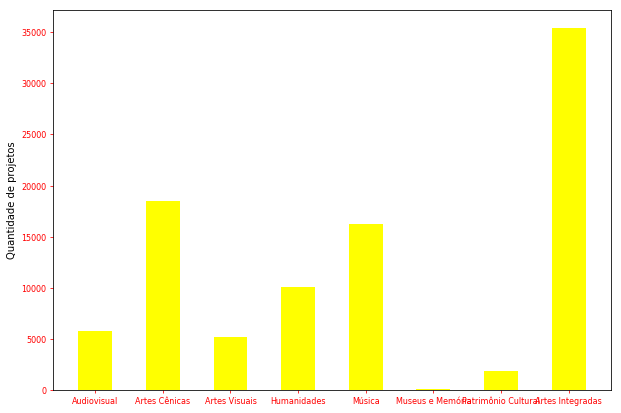

Audiovisual  :  5842
Artes Cênicas  :  18481
Artes Visuais  :  5189
Humanidades  :  10047
Música  :  16244
Museus e Memória  :  106
Patrimônio Cultural  :  1900
Artes Integradas  :  35405


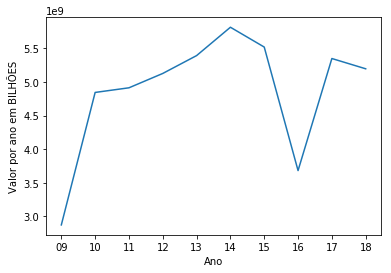

Ano (20xx) : Valor Aprovado
09 : R$ 2872442204.52
10 : R$ 4844665283.63
11 : R$ 4913737874.21
12 : R$ 5127468048.41
13 : R$ 5393211057.10
14 : R$ 5815264749.67
15 : R$ 5520230606.11
16 : R$ 3681422994.36
17 : R$ 5349649888.69
18 : R$ 5196785404.91


In [24]:
print("Total solicitado: %.2f" %totalSolicitado)
print("Total Aprovado: %.2f" %totalAprovado)

invQuantAno = []
invAno = []
for x in reversed(quantAno):
    invQuantAno.append(x)

for x in reversed(anos):
    invAno.append(x)

print(" ------ ")
print("Projetos relacionados ao carnaval 2019: ",carnaval)
print("Valor aprovado para projetos do carnaval 2019: R$ %.2f" %totCarnaval)
print(" ------ ")
print("Quantidade de projetos solicitados com valor R$0: ",projZero)
print(" ------ ")
print("Considerando teto de R$10.000.000,00 para empresas e R$700.000,00 para pessoas físicas")
print("Quantidade de valores aprovados acima do teto: ",acimaTeto)
print(" ------ ")

plt.figure(figsize=(10,7))
plt.ylabel('Quantidade de projetos')
plt.bar(tipos,quantTipos,width=0.5, color='yellow')
plt.tick_params(length=3,labelsize=8,colors='r',
               grid_color='r', grid_alpha=0.5)
plt.show()
for x in range(len(tipos)):
    print(tipos[x]," : ",quantTipos[x])

plt.plot(invAno,invQuantAno)
plt.ylabel('Valor por ano em BILHÕES')
plt.xlabel('Ano')
plt.show()
print("Ano : Valor Aprovado")
for x in range(len(invQuantAno)):
    print(invAno[x],": R$ %.2f" %invQuantAno[x])